### 1) Frame: BDDlab demo  

##### inicializacion

In [1]:
import random

In [4]:
%run -i cudd.py

In [5]:
import ctypes
libcudd = ctypes.CDLL("./libcudd-3.0.0.so")

In [6]:
%run -i cuddCtypesDeclar.py

In [8]:
# principalment para ver dibujos
libBDDlab = ctypes.CDLL("./BDDlab/libBDDlab.so")

In [9]:
%run -i BDDlabCtypesDeclar.py

In [10]:
import numpy as np

#### Funciones



*** A ver, estas funciones no parecen referenciar y desreferenciar como se dice aquí:
http://web.mit.edu/sage/export/tmp/y/usr/share/doc/polybori/cudd/node3.html#SECTION00037000000000000000

***buf***

In [11]:
# comprueba que dos punteros de ctypes son iguales
# https://stackoverflow.com/questions/69506584/how-to-test-for-pointer-equality-in-python-ctypes
def eqPtr(p1,p2):
    ptr_via_void = ctypes.cast(p1, ctypes.c_void_p).value
    rval_via_void = ctypes.cast(p2, ctypes.c_void_p).value
    return ptr_via_void == rval_via_void



##### Funciones de volcado

In [12]:
def medidas(manager, nodo):
    print("Número de nodos: ", libcudd.Cudd_DagSize(nodo))
    print("mintérminos: ", libcudd.Cudd_CountMinterm(manager,nodo,libcudd.Cudd_ReadSize(manager)))
    print("caminos: ", libcudd.Cudd_CountPath(nodo))
    print("caminos al 1: ", libcudd.Cudd_CountPathsToNonZero(nodo))
    print("hojas: ", libcudd.Cudd_CountLeaves(nodo))
    print("contador de referencias: ", libcudd.Cudd_CheckZeroRef(manager))



In [13]:
def grafica(manager, bdd):
    bddAdd = libcudd.Cudd_BddToAdd(manager,bdd)
    libcudd.Cudd_Ref(bddAdd)
    libBDDlab.write_dd(manager, bddAdd, b'tempo.dot')
    libcudd.Cudd_RecursiveDeref(manager,bddAdd)
    import os 
    os.system('dot -Tpng tempo.dot > tempo.png')
    display(Image(filename='./tempo.png') )

In [14]:
def graficaplus(manager, bdd):
    bddAdd = libcudd.Cudd_BddToAdd(manager,bdd)
    libcudd.Cudd_Ref(bddAdd)
    libBDDlab.write_dd(manager, bddAdd, b'tempo.dot')
    libcudd.Cudd_RecursiveDeref(manager,bddAdd)
    import os 
    os.system('dot -Gdpi=1000 -Tpng tempo.dot > tempo.png')
    display(Image(filename='./tempo.png') )

In [15]:
def graficaComp(manager, bdd):
    libBDDlab.write_dd(manager, bdd, b'tempo.dot')
    import os 
    os.system('dot -Tpng tempo.dot > tempo.png')
    display(Image(filename='./tempo.png') )

In [16]:
def MyPrintMinterm(manager,f):
    libBDDlab.setOutput(manager,b'tempo.txt')
    libcudd.Cudd_PrintMinterm(manager,f) 
    libBDDlab.closeOutput(manager)
    import sys
    file = open('tempo.txt', 'r')
    print(file.read(), flush=True)
    file.close()
    return

In [17]:
# dado el BDD de una relación R, representa
# el grafo de esa relación
# tam es la mitad del numlevels de R
def graficaRel(manager,R,tam):
    dotStr = "digraph G {\n"
    
    booltam = BoolAlg(tam)
    
    for i in range(len(booltam)):
        for j in range(len(booltam)):
            xy= booltam[i] + booltam[j]
            val = evalu(manager, R, xy)
            if val == 1 :
                dotStr = dotStr + f"  {i} -> {j} [label=\" \"];\n"
    dotStr += "}\n"
    
    import sys
    myfile = open('tempo.dot', 'w')
    print(dotStr, file=myfile)
    myfile.close()

    import os 
    os.system('dot -Tpng tempo.dot > tempo.png')
    display(Image(filename='./tempo.png') )
    return

In [18]:
# dado el BDD de una relación R, representa
# el grafo de esa relación
# los nodos tienen color si f vale 1
# tam es la mitad del numlevels de R
def graficaRelfunc(manager,R, f, tam):
    dotStr = "digraph G {\n"
    
    booltam = BoolAlg(tam)
    for i in range(len(booltam)):
        if evalu(manager,f,booltam[i]):
            dotStr = dotStr + f"  {i} [color=red];\n"
            #print(i)
        else:
            dotStr += f"  {i} ;\n"
                     
    
    for i in range(len(booltam)):
        for j in range(len(booltam)):
            xy= booltam[i] + booltam[j]
            val = evalu(manager, R, xy)
            if val == 1 :
                dotStr = dotStr + f"  {i} -> {j} [label=\" \"];\n"
    dotStr += "}\n"
    
    import sys
    myfile = open('tempo.dot', 'w')
    print(dotStr, file=myfile)
    myfile.close()

    import os 
    os.system('dot -Tpng tempo.dot > tempo.png')
    display(Image(filename='./tempo.png') )
    return

In [19]:
# dado el BDD de una relación R, representa
# el grafo de esa relación
# los nodos tienen color si f vale 1
# tam es la mitad del numlevels de R
def graficaRelfuncdir(manager,R, f, tam, tool):
    dotStr = "digraph G {\n"
    
    booltam = BoolAlg(tam)
    for i in range(len(booltam)):
        if evalu(manager,f,booltam[i]):
            dotStr = dotStr + f"  {i} [color=red];\n"
            #print(i)
        else:
            dotStr += f"  {i} ;\n"
                    
    
    for i in range(len(booltam)):
        for j in range(len(booltam)):
            xy= booltam[i] + booltam[j]
            val = evalu(manager, R, xy)
            if (val == 1 and i<j) :
                dotStr = dotStr + f"  {i} -> {j} [label=\" \"];\n"
    dotStr += "}\n"
    
    import sys
    myfile = open('tempo.dot', 'w')
    print(dotStr, file=myfile)
    myfile.close()

    import os 
    os.system(tool +' -Tpng tempo.dot > tempo.png')
    display(Image(filename='./tempo.png') )
    return

##### Funciones de medidas

In [20]:
# dado un bdd f, calcula su perfil, profile, 
# lista con el número de nodos para cada variable
def profile(manager,f):
    # replico el Cudd_ForeachNode, que es una macro
    nodo = [libcudd.Cudd_ReadZero(manager)] # por tener un bdd de ejemplo
    nodo_c = (POINTER(DdNode) * 1)(*nodo)  #<-- sitio para un nodo
    count = 0
    iterator = libcudd.Cudd_FirstNode(manager,f, nodo_c)
    dic = {}
    while not libcudd.Cudd_IsGenEmpty(iterator):
        libcudd.Cudd_NextNode(iterator, nodo_c)
        count = count + 1
        lev = libBDDlab.indiceVar(nodo_c[0])
        if lev in dic:
            dic[lev] = dic[lev] + 1
        else:
            dic[lev] = 1

    prof = [0] * (max(dic.keys()) + 1)
    for i in dic:
        prof[i] = dic[i]
    
    # por una cosa del iterador:
    firstIndexNotnull = next( num for num,val in enumerate(prof) if not val==0)
    prof[firstIndexNotnull] = 1 
    
    libcudd.Cudd_GenFree(iterator)
    
    return prof

In [21]:
# dado un bdd f, calcula su perfil, profile, 
# lista con el número de nodos para cada variable
def profileim(manager,f):
    # replico el Cudd_ForeachNode, que es una macro
    nodo = [libcudd.Cudd_ReadZero(manager)] # por tener un bdd de ejemplo
    nodo_c = (POINTER(DdNode) * 1)(*nodo)  #<-- sitio para un nodo
    count = 0
    iterator = libcudd.Cudd_FirstNode(manager,f, nodo_c)
    dic = {}
    while not libcudd.Cudd_IsGenEmpty(iterator):
        libcudd.Cudd_NextNode(iterator, nodo_c)
        count = count + 1
        #graficaComp(manager,nodo_c[0])
        lev = libBDDlab.indiceVar(nodo_c[0])
        print(count,'nodo nivel ',lev,'\n')
        graficaComp(manager,nodo_c[0])
        if lev in dic:
            dic[lev] = dic[lev] + 1
        else:
            dic[lev] = 1

    prof = [0] * (max(dic.keys()) + 1)
    for i in dic:
        prof[i] = dic[i]
    
    # por una cosa del iterador:
    firstIndexNotnull = next( num for num,val in enumerate(prof) if not val==0)
    prof[firstIndexNotnull] = 1 
    
    libcudd.Cudd_GenFree(iterator)
    
    return prof

In [22]:
# dado un bdd f, encuentra la variable x_level que más nodos tiene. La primera
def maxNodeLevel(manager,f):
    prof =  profile(manager, f)
    maxx = max(prof)
    argmaxl = [i for i in range(len(prof)) if prof[i]==maxx]
    return argmaxl[0]

In [23]:
# dado un gestor, encuentra el level x_level máximo
def maxVarLevel(manager):
    for i in range(1000):   # 1000 es max num of vars
        falta = libcudd.Cudd_ReadVars(manager,i)
        if bool(falta) == False:
            return i-1

##### Funciones de test

In [24]:
# evalua las funciones fa en los arrays de lista A
# Y fb en los de listaB
def comprueba(manager,fa,listaA, fb, listaB):
    valorf_a = [0] * len(listaA)
    valorf_b = [0] * len(listaB)
    f_aAdd = libcudd.Cudd_BddToAdd(manager,fa)
    libcudd.Cudd_Ref(f_aAdd)
    f_bAdd = libcudd.Cudd_BddToAdd(manager,fb)
    libcudd.Cudd_Ref(f_bAdd)
    for i in range(len(listaA)):
        miarr_py = listaA[i]
        miarr_c = (ctypes.c_int * len(miarr_py))(*miarr_py)
        valorf_a[i] = int(Cudd_V(libcudd.Cudd_Eval(manager,f_aAdd,miarr_c)))
        miarr_py = listaB[i]
        miarr_c = (ctypes.c_int * len(miarr_py))(*miarr_py)
        valorf_b[i] = int(Cudd_V(libcudd.Cudd_Eval(manager,f_bAdd,miarr_c)))
        print(listaA[i],valorf_a[i],listaB[i],valorf_b[i])    
    libcudd.Cudd_RecursiveDeref(manager,f_aAdd)
    libcudd.Cudd_RecursiveDeref(manager,f_bAdd)

##### Funciones de creación

In [25]:
# genera lista de arrays de B^n
def BoolAlg(n):
    return [[int(x) for x in '{:0{size}b}'.format(i, size=n)] for i in range(2**n)]

In [26]:
#returna el bdd corrspondiente a una lista de mintérminos
def funcMinterm(manager, lista):
    print("usar mejor funcMintermIni")
    for ind,miarr_py in enumerate(lista):
        if ind == 0:
            miarr_c = (ctypes.c_int * len(miarr_py))(*miarr_py)
            elBDD = libcudd.Cudd_CubeArrayToBdd(manager, byref(miarr_c))
            libcudd.Cudd_Ref(elBDD)
        else:
            miarr_c = (ctypes.c_int * len(miarr_py))(*miarr_py)
            tmp = libcudd.Cudd_CubeArrayToBdd(manager, byref(miarr_c))
            libcudd.Cudd_Ref(tmp)
            elBDD = libcudd.Cudd_bddOr(manager, tmp, elBDD)
            libcudd.Cudd_RecursiveDeref(manager,tmp)
    return elBDD

In [27]:
#returna el bdd corrspondiente a una lista de mintérminos
# controla que se usen solo las variables iniciales
# ctypes: los punteros NULL tienen un valor booleano False
def funcMintermIni(manager, lista):   
    
    #*** control de lista vacía
    if not lista:
        return libcudd.Cudd_ReadZero(manager)
    
    for i in range(1000):   # 1000 es max num of vars
        falta = libcudd.Cudd_ReadVars(manager,i)
        if bool(falta) == False:
            num_vars = i
            break
    #*** las variables iniciales se crean si no existen. 
    max_var = max([len(lista[i]) for i in range(len(lista))])
    [ libcudd.Cudd_bddIthVar(manager,i) for i in range(num_vars,max_var)]
    
    for ind,miarr_py in enumerate(lista):
        doses = [2] * (num_vars - len(miarr_py))  #asi los items de la lista no tiene que ser todos del mismo len 
        miarr_py2 = miarr_py + doses
        if ind == 0:
            miarr_c = (ctypes.c_int * len(miarr_py2))(*miarr_py2)
            elBDD = libcudd.Cudd_CubeArrayToBdd(manager, byref(miarr_c))
            libcudd.Cudd_Ref(elBDD)
        else:
            miarr_c = (ctypes.c_int * len(miarr_py2))(*miarr_py2)
            tmp = libcudd.Cudd_CubeArrayToBdd(manager, byref(miarr_c))
            libcudd.Cudd_Ref(tmp)
            elBDD = libcudd.Cudd_bddOr(manager, tmp, elBDD)
            libcudd.Cudd_Ref(elBDD)
            libcudd.Cudd_RecursiveDeref(manager,tmp)

    return elBDD

In [28]:
# genera una función al azar de size variables 
# density indica la densidad del onset
def randomFunc(manager, size, density):
    import random
    Bn = BoolAlg(size)
    # 1/(1-density) es una cuenta
    minterm = [int(random.uniform(0, 1.0/(1.0-density))) for _ in range(len(Bn))]
    arr_f = [Bn[i] for i in  range(0,len(Bn)) if minterm[i]==1]
    return funcMintermIni(migestor,arr_f)

In [29]:
# número de minterms de un nodo, replica una de cudd
# no funciona porque no toma en cuenta los complementados
# no es por eso! es porque no toma en cuenta los saltos de nivel
def numMinterms_viejo(manager,f,tam, tamOrig):
    if libcudd.Cudd_IsConstant(f):
        if libcudd.Cudd_V(f) == 0:
            return 0
        else:
            print("aporta")
            return 1
    
    t = libcudd.Cudd_T(f)
    print("t ",libBDDlab.indiceVar(t))
    print("t ",libBDDlab.indiceVar(libBDDlab.My_Regular(t)))
    if libBDDlab.My_IsComplemented(f):
        thenNode = libBDDlab.My_Regular(libBDDlab.My_Cudd_Not(t))
    else:
        thenNode = libBDDlab.My_Regular(t)
    print("thenNode ",libBDDlab.indiceVar(thenNode))
    print("thenNode ",libBDDlab.indiceVar(libBDDlab.My_Regular(thenNode)))
 
        
        
    e = libcudd.Cudd_E(f)
    if libBDDlab.My_IsComplemented(f):
        #elseNode = libBDDlab.My_Cudd_Not(libBDDlab.My_Regular(libcudd.Cudd_E(f)))
        elseNode = libBDDlab.My_Cudd_Not(libcudd.Cudd_E(f))
    else:
        elseNode = e


    if libcudd.Cudd_IsConstant(thenNode):
        print("es esto")
        levelT = tamOrig
        contribT = 1
    else:
        levelT = libBDDlab.indiceVar(thenNode)
        
        print("tam ",tam )
        print("levelt ",levelT)
        print("posit ",tam - levelT)
        contribT = numMinterms(manager,thenNode,tam - levelT, tamOrig)
        
    diffthen = levelT-libBDDlab.indiceVar(libBDDlab.My_Regular(f))
    
    print("T ",levelT,libBDDlab.indiceVar(libBDDlab.My_Regular(f)) ,diffthen)
    if libcudd.Cudd_IsConstant(elseNode):
        levelE = tamOrig
        contribE = 0
    else:
        levelE = libBDDlab.indiceVar(libBDDlab.My_Regular(elseNode))
        contribE = numMinterms(manager,elseNode,tam - levelE, tamOrig)
            
    diffelse = levelE-libBDDlab.indiceVar(libBDDlab.My_Regular(f))
    print("E ",levelE,libBDDlab.indiceVar(libBDDlab.My_Regular(f)) ,diffelse)
    
    return (2**(diffthen-1))*contribT+(2**(diffelse-1))*contribE

In [30]:
# número de minterms de un nodo, replica una de cudd
# no funciona porque no toma en cuenta los complementados
# no es por eso! es porque no toma en cuenta los saltos de nivel
def numMinterms(manager,f,tam, tamOrig):
    if libcudd.Cudd_IsConstant(f):
        if libcudd.Cudd_V(f) == 0:
            return 0
        else:
            print("aporta")
            return 1
    print("sí")
    t = libcudd.Cudd_T(f)
    print("t ",libBDDlab.indiceVar(t))
    print("t ",libBDDlab.indiceVar(libBDDlab.My_Regular(t)))
    if libBDDlab.My_IsComplemented(f):
        thenNode = libBDDlab.My_Regular(libBDDlab.My_Cudd_Not(t))
    else:
        thenNode = libBDDlab.My_Regular(t)
    print("thenNode ",libBDDlab.indiceVar(thenNode))
    print("thenNode ",libBDDlab.indiceVar(libBDDlab.My_Regular(thenNode)))
 
        
        
    e = libcudd.Cudd_E(f)
    if libBDDlab.My_IsComplemented(f):
        #elseNode = libBDDlab.My_Cudd_Not(libBDDlab.My_Regular(libcudd.Cudd_E(f)))
        elseNode = libBDDlab.My_Cudd_Not(libcudd.Cudd_E(f))
    else:
        elseNode = e


    if libcudd.Cudd_IsConstant(thenNode):
        print("es esto")
        levelT = tamOrig
        contribT = 1
    else:
        levelT = libBDDlab.indiceVar(thenNode)
        print("tam ",tam )
        print("levelt ",levelT)
        print("entro por t con ",tam - levelT -1," y orig ",tamOrig)
        contribT = numMinterms(manager,thenNode,tam - levelT -1, tamOrig)
        
    diffthen = levelT-libBDDlab.indiceVar(libBDDlab.My_Regular(f))
    print("T ",levelT,libBDDlab.indiceVar(libBDDlab.My_Regular(f)) ,diffthen)
    
    if libcudd.Cudd_IsConstant(elseNode):
        levelE = tamOrig
        contribE = 0
    else:
        levelE = libBDDlab.indiceVar(libBDDlab.My_Regular(elseNode))
        print("levele ",levelE)
        print("entro por e con ",tam - levelE -1," y orig ",tamOrig)
        contribE = numMinterms(manager,elseNode,tam - levelE -1, tamOrig)
            
    diffelse = levelE-libBDDlab.indiceVar(libBDDlab.My_Regular(f))
    print("E ",levelE,libBDDlab.indiceVar(libBDDlab.My_Regular(f)) ,diffelse)
    
    print("retorno: ",(2**(diffthen-1))*contribT+(2**(diffelse-1))*contribE)
    return (2**(diffthen-1))*contribT+(2**(diffelse-1))*contribE

In [31]:
# tercer intento, con chatgpt, ese cuñado
# que dependa de las tam primeras variables
# esta parece que sí funciona
def get_1_Minterm(manager, f,tam):
    #numVars = libcudd.Cudd_ReadSize(manager);

    varis=[0] * tam
    for i in range(tam):
        varis[i] = libcudd.Cudd_bddIthVar(manager,i)
        #varis[i] = libcudd.Cudd_Support(manager,f)
    varis_c = (POINTER(DdNode) * len(varis))(*varis)

    # Obtener el mintérmino n de f
    result = libcudd.Cudd_bddPickOneMinterm(manager, f, varis_c, tam)
    
    return result

In [32]:
# devuelve el bdd de n minterms de f
# se supone que f solo depende de las tam primeras variables
# cuidado de no pedir de más
def getSomeMinterms(manager,n, f,tam):
    #result = libcudd.Cudd_ReadZero(manager)
    result = libcudd.Cudd_bddAnd(manager,f, libBDDlab.My_Cudd_Not(f))
    fdec = f
    for i in range(n):
        temp = get_1_Minterm(manager,fdec,tam)
        result = libcudd.Cudd_bddOr(manager,result,temp)
        fdec = libcudd.Cudd_bddAnd(manager,fdec, libBDDlab.My_Cudd_Not(temp))
    return result

    

In [33]:
# número de minterms de un nodo, replica una de cudd
# al final funciona solo para ADD
# además, que dependa de x0
def numMintermsAdd2(manager,f,tam, tamOrig):
    thenNode = libcudd.Cudd_T(f)
    elseNode = libcudd.Cudd_E(f)

    if libcudd.Cudd_IsConstant(thenNode):
        levelT = tamOrig
        if libcudd.Cudd_V(thenNode) == 0:
            contribT = 0
        else:
            contribT = 1   
    else:
        levelT = libBDDlab.indiceVar(thenNode)
        contribT = numMintermsAdd2(manager,thenNode,tam - levelT, tamOrig)
        
    diffthen = levelT-libBDDlab.indiceVar(f)
    
    if libcudd.Cudd_IsConstant(elseNode):
        levelE = tamOrig
        if libcudd.Cudd_V(elseNode) == 0:
            contribE = 0
        else:
            contribE = 1   
    else:
        levelE = libBDDlab.indiceVar(libBDDlab.My_Regular(elseNode))
        contribE = numMintermsAdd2(manager,elseNode,tam - levelE, tamOrig)
            
    diffelse = levelE-libBDDlab.indiceVar(f)
    
    return (2**(diffthen-1))*contribT+(2**(diffelse-1))*contribE

In [34]:
# devuelve los k lexicográficamente primeros minterms
# que depende de tam variables
# lanza excepción si no hay bastantes minterms
def PickFirstMintermsAdd(manager,f,tam,k):
    # calculo los minterms que tengo
    numMT = libcudd.Cudd_CountMinterm(manager,f,tam)
    if numMT < k:
        raise Exception("Not enough minterms.")
    if numMT == k:
        return f

    # veo los hijos

    thenNode = libcudd.Cudd_T(f)
    elseNode = libcudd.Cudd_E(f)

    numThen = libcudd.Cudd_CountMinterm(manager,thenNode,tam-1)
    if numThen >= k:
        print("numthen",numThen)
        grafica(manager,thenNode)
        return PickFirstMintermsAdd(manager,thenNode,tam-1,k)
    else:
        faltan = k - numThen
        print("faltan",faltan)
        grafica(manager,elseNode)
        faltaNode = PickFirstMintermsAdd(manager,elseNode,tam -1,faltan)
        return libcudd.Cudd_bddAnd(manager, thenNode, faltaNode)
    
    print("f: ", libcudd.Cudd_CountMinterm(manager,f,tam))
    print("then: ", libcudd.Cudd_CountMinterm(manager,thenNode,tam-1))
    print("else: ", libcudd.Cudd_CountMinterm(manager,elseNode,tam-1))
    
    
    return
    if libcudd.Cudd_IsConstant(thenNode):
        levelT = tamOrig
        if libcudd.Cudd_V(thenNode) == 0:
            NcontribT = 0
        else:
            NcontribT = 1   
    else:
        levelT = libBDDlab.indiceVar(thenNode)
        contribT = numMintermsAdd2(manager,thenNode,tam - levelT, tamOrig)
        

    if libcudd.Cudd_IsConstant(thenNode):
        levelT = tam
    else:
        levelT = libBDDlab.indiceVar(libBDDlab.My_Regular(thenNode))
            
    diffthen = levelT-libBDDlab.indiceVar(f)

    #if libcudd.Cudd_IsConstant(elseNode):
        #levelE = tam

            
    diffelse = levelE-libBDDlab.indiceVar(f)
    
    numMThijo0 = libcudd.Cudd_CountMinterm(manager,elseNode,tam - levelE)
    numMThijo1 = libcudd.Cudd_CountMinterm(manager,thenNode,tam - levelT)
    # caso base
    print(numMThijo0,numMThijo1)
    print(levelE,levelT)
    print(libBDDlab.indiceVar(libBDDlab.My_Regular(libBDDlab.My_Cudd_Not(libcudd.Cudd_T(libcudd.Cudd_E(f))))))
    print(libBDDlab.indiceVar(libBDDlab.My_Regular(libcudd.Cudd_T(libcudd.Cudd_E(f)))))
    print(libBDDlab.indiceVar(libBDDlab.My_Regular(f)))
    return elseNode
    
    # case recursivo

In [35]:
# otro intento de coger 

In [36]:
# devuelbe el BDD que calcula la paridad de las size priemras variables
def parity(manager, size):
    par = libcudd.Cudd_ReadLogicZero(manager)
    for i in range(size):
        var = libcudd.Cudd_bddIthVar(manager, i)
        par = Cudd_bddXor(manager, par, var)
    return par

##### Funciones de evaluación

In [37]:
def evalu(manager, f, miarr_py):
    fAdd = libcudd.Cudd_BddToAdd(manager,f)
    libcudd.Cudd_Ref(fAdd)
    miarr_c = (ctypes.c_int * len(miarr_py))(*miarr_py)
    #print(miarr_py," --> ",int(Cudd_V(libcudd.Cudd_Eval(manager,fAdd,miarr_c))))
    tmp = int(Cudd_V(libcudd.Cudd_Eval(manager,fAdd,miarr_c)))
    libcudd.Cudd_RecursiveDeref(manager,fAdd)
    return(tmp)

##### Funciones de bases

In [38]:
# devuelve el array de bits ret tal que (arr)_can = (ret)_nueva
def cambiaBaseArray(manager, arr,nuevaBase):
    ret = []
    for i in range(len(nuevaBase)):
        ret.append(evalu(manager,nuevaBase[i],arr))
    return(ret)

In [39]:
#define el bdd de la relación de cambio de base
# de la canónica a la nuevaBase
def RelCambiaBase(manager, nuevaBase):
    x=[0] * 2 * len(nuevaBase)
    for i in range(2 * len(nuevaBase)):
        x[i] = libcudd.Cudd_bddIthVar(manager,i)
    ite = [0] * len(nuevaBase)
    for i in range(len(nuevaBase)):
        ite[i] = libcudd.Cudd_bddIte(manager,x[i + len(nuevaBase)],nuevaBase[i],libBDDlab.My_Cudd_Not(nuevaBase[i]))
        libcudd.Cudd_Ref(ite[i])
    tmp = libcudd.Cudd_bddAnd(manager,ite[0],ite[1])
    libcudd.Cudd_Ref(tmp)
    for i in range(2,len(nuevaBase)):
        tmp = libcudd.Cudd_bddAnd(manager,tmp,ite[i])
    R = tmp
    libcudd.Cudd_RecursiveDeref(manager,tmp)
    for i in range(len(nuevaBase)):
        libcudd.Cudd_RecursiveDeref(manager,ite[i])
    return(R)

 


In [40]:
# define la rel de cambio de base a partir de la lista hecho con 
# las evaluaciones en toda la tabla de verdad
def RelCambiaBaseTab(manager, nuevaBase):
    Btam = [[int(x) for x in '{:0{size}b}'.format(i, size=tam)] for i in range(0,2**tam)]
    Btampar = [cambiaBaseArray(manager, arr,nuevaBase) for arr in Btam]
    arrR = [Btam[i]+Btampar[i] for i in range(len(Btam))]
    R = funcMinterm(manager, arrR)
    return(R)

In [41]:
#devuelve un array q de bdd tal que la imagen de (arr)_pi por los q es arr
def CambioInverso(manager,nuevaBase):
    n = len(nuevaBase)
    xx = [0] * n
    for i in range(n):
        xx[i] = libcudd.Cudd_bddIthVar(manager,i)
    xx_c = (POINTER(DdNode) * len(xx))(*xx)
    
    cubo = [0] * n
    for i in range(n):
        miarr_py = [j for j in range(n) if j != i]
        miarr_c = (ctypes.c_int * len(miarr_py))(*miarr_py)
        cubo[i] = libcudd.Cudd_IndicesToCube(manager,miarr_c,n - 1)
        libcudd.Cudd_Ref(cubo[i])
    
    R = RelCambiaBase(manager, nuevaBase)
    q=[0] * n
    for i in range(n):
        q[i] = libcudd.Cudd_bddExistAbstract(manager, R ,cubo[i])
        libcudd.Cudd_Ref(q[i])
    
    qdef=[0] * n
    for i in range(n):
        qdef[i] = libcudd.Cudd_Cofactor(manager,q[i],xx[i])
        libcudd.Cudd_Ref(qdef[i])

    # bajar los niveles de las variables que crea RelCambiaBase
    qdef2=[0] * n
    yy = [0] * n
    for i in range(n):
        yy[i] = libcudd.Cudd_bddIthVar(manager,i + n)
    yy_c = (POINTER(DdNode) * len(yy))(*yy)
    for i in range(n):
        qdef2[i] = libcudd.Cudd_bddSwapVariables(manager,qdef[i],xx_c, yy_c,n)
        #qdef2[i] = libcudd.Cudd_bddSwapVariables(manager,qdef[i],byref(xx), byref(yy))
        libcudd.Cudd_Ref(qdef2[i])

#    for i in range(n):
#        qdef2[i] = libcudd.Cudd_bddIte(manager,x[i], qdef[i], libBDDlab.My_Cudd_Not(qdef[i]))
#        libcudd.Cudd_Ref(qdef2[i])

    for i in range(n):
        libcudd.Cudd_RecursiveDeref(manager,cubo[i])
        libcudd.Cudd_RecursiveDeref(manager,q[i])
        libcudd.Cudd_RecursiveDeref(manager,qdef[i])
        
 
    return(qdef2)

In [42]:
# nueva versión: 
# dada un bdd fa y un array nuevaBase de bdd que sean base de biparticiones,
# devuelve el bdd fb que verifica fa(v1)=fb(v2) siendo
# v1 un array de bits canónicos y v2 su equivalente en nuevaBase

def CambiaBase(manager, fa, nuevabase):
    #se compone con la inversa
    q = CambioInverso(manager,nuevabase)
    q_c = (POINTER(DdNode) * len(q))(*q)
    fb = libcudd.Cudd_bddVectorCompose(migestor,fa, q_c)
    libcudd.Cudd_Ref(fb)
    return fb
    
                      


In [43]:
# dada una serie de bloques, coge de cada bloque al azar la mitad
def partebin(lista):
    bloques = []
    for b in lista:
        b0 = random.sample(b, k=int(len(b)/2))
        b1 = [x for x in b if x not in b0]
        bloques.append(b0)
        bloques.append(b1)
    return(bloques)

In [44]:
# devuelbe un array de bdd que forman base de size variables
def randomBase(manager, size):
    Bn = BoolAlg(size)
    B=[[]] * size
    
    B[0] = partebin([range(len(Bn))])
    for i in range(1,size):
        B[i] = partebin(B[i - 1])
    # B[i] son bloques de tamaño 2^(n-i-1)
    part = [[]] * size
    for i in range(size):
        acc = []
        for j in range(2**i):
            acc = acc + B[i][2*j]
                             
        part[i] = acc
        part[i].sort()
    
    arr_p=[[]] * size
    
    for i in range(size):
        arr_p[i] =[Bn[i] for i in part[i]]
   
    pi=[0] * size
    for i  in range(size):
        pi[i] = funcMintermIni(manager,arr_p[i])
    return pi

In [45]:
# dados unos bdd que forman una base parcial propia para f
# (es decir, que los bloques de la base, salvo como mucho uno, 
# son o bien completamente 1 para f o bien completamente 0)
# la prolonga hasta una base total propia para f
def ampliaBaseParcial(manager,f,tam, baseparcial):
    # calculo los bloques 
    #(esto es complejidad exponencial. Debería hacerse con relaciones BDD)
    Bloques = [libcudd.Cudd_ReadOne(manager)]
    for i in range(len(baseparcial)):
        temp = []
        for C in Bloques:
            cP = libcudd.Cudd_bddAnd(manager,C,baseparcial[i])
            cnP = libcudd.Cudd_bddAnd(manager,C,libBDDlab.My_Cudd_Not(baseparcial[i]))
            temp = temp + [cP] +[cnP]
        Bloques = temp
        
    # Se generan los NuevPos Y NuevNeg
    NuevPos = []
    NuevNeg = []
    num_bloq = libcudd.Cudd_CountMinterm(manager,Bloques[0],tam)
    nf=libBDDlab.My_Cudd_Not(f)
    for C in Bloques:
        cf = libcudd.Cudd_bddAnd(manager,C,f)
        cnf = libcudd.Cudd_bddAnd(manager,C,nf)
        num_cf = libcudd.Cudd_CountMinterm(manager,cf,tam)
        num_cnf = libcudd.Cudd_CountMinterm(manager,cnf,tam)
        if num_cf == 0:
            # todos los de C son negativos
            temp = getSomeMinterms(manager,int(num_bloq/2),C,tam)
            notemp = libcudd.Cudd_bddAnd(manager,C,libBDDlab.My_Cudd_Not(temp))
            NuevPos = NuevPos + [temp]
            NuevNeg = NuevNeg + [notemp]
        if num_cnf == 0:
            # todos los de C son positivos
            temp = getSomeMinterms(manager,int(num_bloq/2),C,tam)
            notemp = libcudd.Cudd_bddAnd(manager,C,libBDDlab.My_Cudd_Not(temp))
            NuevPos = NuevPos + [temp]
            NuevNeg = NuevNeg + [notemp]
        if num_cf != 0 and num_cnf != 0:
            # en C hay ambos
            if num_cf >= num_cnf:
                temp = getSomeMinterms(manager,int(num_bloq/2),cf,tam)
                notemp = libcudd.Cudd_bddAnd(manager,C,libBDDlab.My_Cudd_Not(temp))
                NuevPos = NuevPos + [temp]
                NuevNeg = NuevNeg + [notemp]
            if num_cf < num_cnf:
                notemp = getSomeMinterms(manager,int(num_bloq/2),cnf,tam) # cuidado notemp
                temp = libcudd.Cudd_bddAnd(manager,C,libBDDlab.My_Cudd_Not(notemp))
                NuevPos = NuevPos + [temp]
                NuevNeg = NuevNeg + [notemp]

    # construyo el nuevo elemento de la base
    p = libBDDlab.My_Cudd_Not(libcudd.Cudd_ReadOne(manager))
    for bdd in NuevPos:
        p = libcudd.Cudd_bddOr(migestor,p,bdd)
    
    return p

        
        
    

In [46]:
# crea una base propia para f
def creaBasePropia(manager,f,tam):
    base = []
    for i in range(tam):
        part = ampliaBaseParcial(manager,f,tam, base)
        base = base + [part]
    return base

##### Funciones de Relaciones y funciones

In [47]:
# crea el BDD de la relación x~y si todos los bits salvo el i son iguales
def RelEqExcept(manager,tam,i):
    # *** corregir qué pasa cuando i=0
    listanum = list(range(0,tam))
    listanum.remove(i)
    R = libcudd.Cudd_ReadOne(manager)
    libcudd.Cudd_Ref(R)
    for i in listanum:
        xi = libcudd.Cudd_bddIthVar(manager,i)
        yi = libcudd.Cudd_bddIthVar(manager,tam + i)
        temp = libcudd.Cudd_bddXnor(manager,xi,yi)
        R = libcudd.Cudd_bddAnd(manager, R,temp)
    return R 

In [48]:
# crea el BDD de la relación x~y si todos los bits salvo el i son iguales
# y además x<y
def RelEqExceptdir(manager,tam,i):
    # *** corregir qué pasa cuando i=0
    listanum = list(range(0,tam))
    listanum.remove(i)
    R = libcudd.Cudd_ReadOne(manager)
    libcudd.Cudd_Ref(R)
    for j in listanum:
        xj = libcudd.Cudd_bddIthVar(manager,j)
        yj = libcudd.Cudd_bddIthVar(manager,tam + j)
        temp = libcudd.Cudd_bddXnor(manager,xj,yj)
        R = libcudd.Cudd_bddAnd(manager, R,temp)
    xi = libcudd.Cudd_bddIthVar(manager,i)
    yi = libcudd.Cudd_bddIthVar(manager,tam + i)
    temp = libcudd.Cudd_bddAnd(manager, libBDDlab.My_Cudd_Not(xi) ,yi)
    R = libcudd.Cudd_bddAnd(manager, R,temp)
    return R 

In [49]:
# crea el BDD de la relación x~y si los bits de la lista están flipados
def RelEqExceptList(manager,tam,lista):
    # *** corregir qué pasa cuando len(lista)==0
    listanum = list(range(0,tam))
    R = libcudd.Cudd_ReadOne(manager)
    libcudd.Cudd_Ref(R)
    for i in listanum:
        xi = libcudd.Cudd_bddIthVar(manager,i)
        yi = libcudd.Cudd_bddIthVar(manager,tam + i)
        if i in lista:
            temp = libcudd.Cudd_bddXor(manager,xi,yi)
        else:
            temp = libcudd.Cudd_bddXnor(manager,xi,yi)
        R = libcudd.Cudd_bddAnd(manager, R,temp)
    return R 

In [50]:
# crea el BDD de la relación x~y si los bits son iguales
# salvo en los de la lista, que están libres
def RelEqOrExceptList(manager,tam,lista):
    # *** corregir qué pasa cuando len(lista)==0
    listanum = list(range(0,tam))
    R = libcudd.Cudd_ReadOne(manager)
    libcudd.Cudd_Ref(R)
    for i in listanum:
        xi = libcudd.Cudd_bddIthVar(manager,i)
        yi = libcudd.Cudd_bddIthVar(manager,tam + i)
        if i in lista:
            temp = libcudd.Cudd_ReadOne(manager)
        else:
            temp = libcudd.Cudd_bddXnor(manager,xi,yi)
        R = libcudd.Cudd_bddAnd(manager, R,temp)
    return R 

In [51]:
# crea el BDD de la relación x~y si todos los bits de la lista son iguales
def RelEq(manager,tam,lista):
    # *** corregir qué pasa cuando i=0
    R = libcudd.Cudd_ReadOne(manager)
    libcudd.Cudd_Ref(R)
    for i in lista:
        xi = libcudd.Cudd_bddIthVar(manager,i)
        yi = libcudd.Cudd_bddIthVar(manager,tam + i)
        temp = libcudd.Cudd_bddXnor(manager,xi,yi)
        R = libcudd.Cudd_bddAnd(manager, R,temp)
    return R 

In [52]:
# dado el BDD R de una relación y un array de bits x, 
# devuelve el bdd de todos los y tal que xRy
def evalRel(manager,R,x):
    temp = R
    for ind,b in enumerate(x):
        if b == 1:
            var = libcudd.Cudd_bddIthVar(manager,ind)
        if b == 0:
            var = libBDDlab.My_Cudd_Not(libcudd.Cudd_bddIthVar(manager,ind))
        temp = libcudd.Cudd_Cofactor(migestor,temp,var)
    return temp
    


In [53]:
# dada un BDD F que representa una relación funcional
# (x~y si f(x)=y para la función f) evalua f en el
# x codificado por la lista
def evalFunRelCube(manager, F, lista):
    temp = F
    for ind,b in enumerate(lista):
        if b == 1:
            var = libcudd.Cudd_bddIthVar(manager,ind)
        if b == 0:
            var = libBDDlab.My_Cudd_Not(libcudd.Cudd_bddIthVar(manager,ind))
        temp = libcudd.Cudd_Cofactor(migestor,temp,var)
    return temp

In [54]:
# dada una relación funcional F y una lista de listas de bits,
# evalua F en cada lista de la lista
def evalFunRel(manager,F,listalista):
    for lista in listalista:
        temp = F
        for ind,b in enumerate(lista):
            if b == 1:
                var = libcudd.Cudd_bddIthVar(manager,ind)
            if b == 0:
                var = libBDDlab.My_Cudd_Not(libcudd.Cudd_bddIthVar(manager,ind))
            temp = libcudd.Cudd_Cofactor(migestor,temp,var)
        valor = [0] * 2 * len(lista)
        valor_c = (ctypes.c_int * len(valor))(*valor)
        #p_valor_c = (c_int * (len(lista)))()
        libcudd.Cudd_BddToCubeArray(manager,temp,byref(valor_c))
        print(lista,'-->',valor_c)
        #print(lista,'-->',list(p_valor_c))
    return valor_c
#bufff, no funciona
#bufff, que no no funciona

In [55]:
# dada un BDD F que representa una relación funcional
# devuelve el BDD que caracteriza los valores que toma.
# size es el tamaño del código de cada elemento, o sea
# la mitad del número de niveles de la relación funcional
# no hace falta que F sea funcional
def setOfValues(manager,F, size):
    temp = F
    for i in range(size):
        var = libcudd.Cudd_bddIthVar(manager,i)
        cof1 = libcudd.Cudd_Cofactor(manager,temp,var)
        cof0 = libcudd.Cudd_Cofactor(manager,temp,libBDDlab.My_Cudd_Not(var))
        temp = libcudd.Cudd_bddOr(manager,cof1,cof0)
    return temp

In [56]:
# define el bdd de la relación x~y si f(x)> f(y) para cierta
# funcion f. tam da el tamaño de los arrays sobre los que se aplica f f
def Rel_fxgtfy(manager, f, tam):
    fdesp = transVar(manager,f,tam)
    # if f(x) > f(y), o sea si f(y)=>f(x)
    conj = libcudd.Cudd_bddAnd(manager,f,fdesp) 
    libcudd.Cudd_Ref(conj)
    R =  libcudd.Cudd_bddOr(manager,conj,libBDDlab.My_Cudd_Not(fdesp))
    libcudd.Cudd_Ref(R)
    libcudd.Cudd_RecursiveDeref(manager,conj)
    libcudd.Cudd_RecursiveDeref(manager,fdesp)
    return(R)

In [57]:
# define el bdd de la relación x~y si f(x)> f(y) para cierta
# funcion f. tam da el tamaño de los arrays sobre los que se aplica f 
# otra prueba
def Rel_fxgtfy3(manager, f, tam):
    fdesp = transVar(manager,f,tam)
    # if f(x) > f(y), o sea si f(y)=>f(x)
    conj11 = libcudd.Cudd_bddAnd(manager,f,fdesp) 
    libcudd.Cudd_Ref(conj11)
    conj10 = libcudd.Cudd_bddAnd(manager,f,libBDDlab.My_Cudd_Not(fdesp)) 
    libcudd.Cudd_Ref(conj10)
    conj01 = libcudd.Cudd_bddAnd(manager,libBDDlab.My_Cudd_Not(f),fdesp) 
    libcudd.Cudd_Ref(conj01)
    conj00 = libcudd.Cudd_bddAnd(manager,libBDDlab.My_Cudd_Not(f),libBDDlab.My_Cudd_Not(fdesp)) 
    libcudd.Cudd_Ref(conj00)
    temp =  libcudd.Cudd_bddOr(manager,libBDDlab.My_Cudd_Not(conj10),conj01)
    libcudd.Cudd_Ref(temp)
    R =  libcudd.Cudd_bddOr(manager,temp,libBDDlab.My_Cudd_Not(conj00))
    libcudd.Cudd_Ref(R)
    libcudd.Cudd_RecursiveDeref(manager,temp)
    libcudd.Cudd_RecursiveDeref(manager,conj11)
    libcudd.Cudd_RecursiveDeref(manager,conj10)
    libcudd.Cudd_RecursiveDeref(manager,conj01)
    libcudd.Cudd_RecursiveDeref(manager,conj00)
    libcudd.Cudd_RecursiveDeref(manager,fdesp)
    return(R)

In [58]:
# define el bdd de la relación x~y si f(x)> f(y) para cierta
# funcion f. tam da el tamaño de los arrays sobre los que se aplica f f
# modificación: 1) quito la reflexividad
def Rel_fxgtfy2(manager, f, tam):
    R = Rel_fxgtfy3(manager,f,tam)
    libcudd.Cudd_Ref(R)
    Neq = libBDDlab.My_Cudd_Not(Rel_eq(manager,tam))
    libcudd.Cudd_Ref(Neq)
    R2 = libcudd.Cudd_bddAnd(manager,R,Neq) 
    libcudd.Cudd_Ref(R2)
    libcudd.Cudd_RecursiveDeref(manager,R)
    libcudd.Cudd_RecursiveDeref(manager,Neq)
    return(R2)

In [59]:
# define el bdd de la relación x~y si x==y
# es réplica de Cudd_Xeqy
def Rel_eq(manager, tam):
    x=[0] * 2 * tam
    for i in range(2 * tam):
        x[i] = libcudd.Cudd_bddIthVar(manager,i)
    ite = [0] * tam
    for i in range(tam):
        ite[i] = libcudd.Cudd_bddIte(manager,x[i + tam],x[i],libBDDlab.My_Cudd_Not(x[i]))
        libcudd.Cudd_Ref(ite[i])
    tmp = libcudd.Cudd_bddAnd(manager,ite[0],ite[1])
    libcudd.Cudd_Ref(tmp)
    for i in range(2,tam):
        tmp = libcudd.Cudd_bddAnd(manager,tmp,ite[i])
    R = tmp
    libcudd.Cudd_RecursiveDeref(manager,tmp)
    for i in range(tam):
        libcudd.Cudd_RecursiveDeref(manager,ite[i])
    return(R)

 


In [60]:
# devuelve una relación funcional al azar
def randomRelFunc(manager,tam):
    lista = BoolAlg(tam)
    minterms = [ x + [int(random.uniform(0, 2)) for _ in range(tam)] for x in lista]
    return funcMintermIni(manager,minterms)
                
    

In [61]:
# dada una relación R, devuelve la relación inversa
def RelInv(manager,R,tam):
    x=[0] * tam
    y=[0] * tam
    for i in range(tam):
        x[i] = libcudd.Cudd_bddIthVar(manager,i)
        y[i] = libcudd.Cudd_bddIthVar(manager,tam +i)
    yx = y + x
    yx_c= (POINTER(DdNode) * len(yx))(*yx)
    Rinv = libcudd.Cudd_bddVectorCompose(manager,R, yx_c)
    libcudd.Cudd_Ref(Rinv)
    return Rinv 

In [62]:
# dada una relación R y un bdd x, devuelve el bdd
# de los sucesores de los vértices de x
def Succ(manager,R,x,tam):
    gammax = libcudd.Cudd_bddAnd(manager, R, x)
    succesors =  transVarMinus(migestor,setOfValues(manager,gammax,tam),tam,tam,tam)
    return succesors

In [63]:
# dada una relación R y un bdd x, devuelve el bdd
# de los sucesores de los sucesores de los vértices de x
def Succ2(manager,R,x,tam):
    gammax = Succ(manager, R, x, tam)
    gamma2x = Succ(manager, R, gammax, tam)
    return gamma2x

##### Funciones de traslado de variables

In [64]:
# coje la funcion f que depende de las variables x_0,...,x_(tam-1)
# y devuelve la 
# función similar que depemde de las x_(0+tam),...,x_(n+tam)
def transVar(manager,f,tam):
    for i in range(2*tam):
        temp=libcudd.Cudd_bddIthVar(manager,i)
    
    x=[0] * tam
    for i in range(tam):
        x[i] = libcudd.Cudd_bddIthVar(manager,tam +i)
    x_c = (POINTER(DdNode) * len(x))(*x)
    fdesp = libcudd.Cudd_bddVectorCompose(manager,f, x_c)
    libcudd.Cudd_Ref(fdesp)
    return fdesp
    


In [65]:
# coje la funcion f que depende de las variables x_0,...,x_(tam-1)
# y devuelve la 
# función similar que depemde de las x_(0+n),...,x_(tam-1 +n)
def transVarn(manager,f,tam,n):
    for i in range(tam +n):
        temp=libcudd.Cudd_bddIthVar(manager,i)
    
    x=[0] * tam
    for i in range(tam):
        x[i] = libcudd.Cudd_bddIthVar(manager,n +i)
    x_c = (POINTER(DdNode) * len(x))(*x)
    fdesp = libcudd.Cudd_bddVectorCompose(manager,f, x_c)
    libcudd.Cudd_Ref(fdesp)
    return fdesp
    


In [66]:
# coje la funcion f que depende de las variables x_a,...,x_(a+tam-1)
# y devuelve la 
# función similar que depemde de las x_(a-n),...,x_(a+tam-1 -n)
# cuida que n>=a
def transVarMinus(manager,f, a,tam,n):
    for i in range(a + tam):
        temp=libcudd.Cudd_bddIthVar(manager,i)
    
    x=[0] * (a + tam)
    for i in range(a):
        x[i] = libcudd.Cudd_bddIthVar(manager,0) # no usado
    for i in range(a, a + tam):
        x[i] = libcudd.Cudd_bddIthVar(manager, i - n)
    x_c = (POINTER(DdNode) * len(x))(*x)
    fdesp = libcudd.Cudd_bddVectorCompose(manager,f, x_c)
    libcudd.Cudd_Ref(fdesp)
    return fdesp
    


In [67]:
# coje la funcion f que depende de las variables x_0,...,x_(tam-1)
# y x_2*tam,...,x_(3*tam-1) [o sea, Rel(x,z)]
# y devuelve la 
# función similar que depemde de las x_(0),...,x_(2*tam-1) [o sea, Rel(x,y)]
def transz_to_y(manager,f,tam):
    #for i in range(2*tam):
    #    temp=libcudd.Cudd_bddIthVar(manager,i)
    
    x=[0] * tam
    for i in range(tam):
        x[i] = libcudd.Cudd_bddIthVar(manager,i)

    y=[0] * tam
    for i in range(tam):
        y[i] = libcudd.Cudd_bddIthVar(manager,tam +i)

    z=[0] * tam
    for i in range(tam):
        z[i] = libcudd.Cudd_bddIthVar(manager,2*tam +i)

    xzy = x + z + y
    xzy_c = (POINTER(DdNode) * len(xzy))(*xzy)
    fdesp = libcudd.Cudd_bddVectorCompose(manager,f, xzy_c)
    libcudd.Cudd_Ref(fdesp)
    return fdesp
    


In [68]:
# devuelve un vector con 0 en las variables de las que no depende f
# y 1 en las que sí
def MyVectorSupport(manager,f):
    sup = [0] * libcudd.Cudd_ReadSize(manager)
    cubo = libcudd.Cudd_Support(manager,f)
    while (not libcudd.Cudd_IsConstant(cubo)):
        level =libcudd.Cudd_NodeReadIndex(cubo)
        sup[level] = 1
        cubo = libcudd.Cudd_T(cubo)
    return sup
    


##### Funciones de reducción

In [69]:
# El espacio $B^tam$ se aparea en torno al bit pivot
# esos pares (x,y) se dividen en bloques 11,00,01,10
# el bloque ab son los pares con f(x)=a y f(y)=b
# calcula la base cambiando el bit pivot de la 
# de entrada por la partición formada por
# los elementos x de B11 y B10, y los elementos y de
# B00 y B01
def pasar01a10(manager,f,tam,pivot):
    fdesp = transVar(manager,f,tam)
    R = RelEqExcept(manager,tam,pivot)
    #x_piv = 1
    x_piv = libcudd.Cudd_bddIthVar(manager,pivot)
    #x_piv = 0
    notx_piv = libBDDlab.My_Cudd_Not(x_piv)
    
    # en los pares (x,y), las x tienen 0 en pivot y las y 1
    temp = libcudd.Cudd_bddAnd(manager,R,notx_piv)
    x_pivdesp = libcudd.Cudd_bddIthVar(manager, tam + pivot)
    Rdir = libcudd.Cudd_bddAnd(manager,temp,x_pivdesp)
    
    #los bloques
    temp = libcudd.Cudd_bddAnd(manager,Rdir,f)
    B11 = libcudd.Cudd_bddAnd(manager,temp,fdesp)

    temp = libcudd.Cudd_bddAnd(manager,Rdir,libBDDlab.My_Cudd_Not(f))
    B00 = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))

    temp = libcudd.Cudd_bddAnd(manager,Rdir,libBDDlab.My_Cudd_Not(f))
    B01 = libcudd.Cudd_bddAnd(manager,temp,fdesp)

    temp = libcudd.Cudd_bddAnd(manager,Rdir,f)
    B10 = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))

    #los y de estos bloques 
    temp_pi11 = transVarMinus(manager,setOfValues(manager,B11,tam),tam,tam,tam)
    temp_pi00 = transVarMinus(manager,setOfValues(manager,B00,tam),tam,tam,tam)
    temp_pi10 = transVarMinus(manager,setOfValues(manager,B10,tam),tam,tam,tam)
    temp_pi01 = transVarMinus(manager,setOfValues(manager,B01,tam),tam,tam,tam)
    
    print('var ',pivot,'-->','B11: ',libcudd.Cudd_CountMinterm(manager,temp_pi11,tam),
          'B00: ',libcudd.Cudd_CountMinterm(manager,temp_pi00,tam),
          'B10: ',libcudd.Cudd_CountMinterm(manager,temp_pi10,tam),
          'B01: ',libcudd.Cudd_CountMinterm(manager,temp_pi01,tam))
          
    
    #ahora creo los inversos, para quedarme con los x de los pares de estos bloques
    temp = libcudd.Cudd_bddAnd(manager,R,x_piv)
    notx_pivdesp = libBDDlab.My_Cudd_Not(libcudd.Cudd_bddIthVar(manager, tam + pivot))
    Rdirinv = libcudd.Cudd_bddAnd(manager,temp,notx_pivdesp)
    
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,f)
    B01inv = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))
    temp_pi01inv = transVarMinus(manager,setOfValues(manager,B01inv,tam),tam,tam,tam)

    # fuera de la documentación de la cabecera, añado los x de B00
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,libBDDlab.My_Cudd_Not(f))
    B00inv = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))
    temp_pi00inv = transVarMinus(manager,setOfValues(manager,B00inv,tam),tam,tam,tam)
    # y los de  B10
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,libBDDlab.My_Cudd_Not(f))
    B10inv = libcudd.Cudd_bddAnd(manager,temp,fdesp)
    temp_pi10inv = transVarMinus(manager,setOfValues(manager,B10inv,tam),tam,tam,tam)

     # y los de  B11
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,f)
    B11inv = libcudd.Cudd_bddAnd(manager,temp,fdesp)
    temp_pi11inv = transVarMinus(manager,setOfValues(manager,B11inv,tam),tam,tam,tam)

    
    #colecto los x e y que corresponden
    #a = libcudd.Cudd_bddOr(manager,temp_pi11,temp_pi00)
    #b = libcudd.Cudd_bddOr(manager,a,temp_pi10)
    #pi = libcudd.Cudd_bddOr(manager,b,temp_pi01inv)

    a = libcudd.Cudd_bddOr(manager,temp_pi11inv,temp_pi00)
    b = libcudd.Cudd_bddOr(manager,a,temp_pi10inv)
    pi = libcudd.Cudd_bddOr(manager,b,temp_pi01)

    #cambio de base
    can=[0] * tam
    for i in range(tam):
        can[i] = libcudd.Cudd_bddIthVar(manager,i)
    
    p=can.copy()
    p[pivot]=pi
    q = CambioInverso(manager,p)
    
    q_c = (POINTER(DdNode) * len(q))(*q)
    fb = libcudd.Cudd_bddVectorCompose(manager,f, q_c)
    
    return fb, q

In [70]:
# El espacio $B^tam$ se aparea en torno al bit pivot
# esos pares (x,y) se dividen en bloques 11,00,01,10
# el bloque ab son los pares con f(x)=a y f(y)=b
# calcula la base cambiando el bit pivot de la 
# de entrada por la partición formada por
# los elementos x de B11 y B10, y los elementos y de
# B00 y B01
def pasar01a10y11(manager,f,tam,pivot):
    fdesp = transVar(manager,f,tam)
    R = RelEqExcept(manager,tam,pivot)
    #x_piv = 1
    x_piv = libcudd.Cudd_bddIthVar(manager,pivot)
    #x_piv = 0
    notx_piv = libBDDlab.My_Cudd_Not(x_piv)
    
    # en los pares (x,y), las x tienen 0 en pivot y las y 1
    temp = libcudd.Cudd_bddAnd(manager,R,notx_piv)
    x_pivdesp = libcudd.Cudd_bddIthVar(manager, tam + pivot)
    Rdir = libcudd.Cudd_bddAnd(manager,temp,x_pivdesp)
    
    #los bloques
    temp = libcudd.Cudd_bddAnd(manager,Rdir,f)
    B11 = libcudd.Cudd_bddAnd(manager,temp,fdesp)

    temp = libcudd.Cudd_bddAnd(manager,Rdir,libBDDlab.My_Cudd_Not(f))
    B00 = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))

    temp = libcudd.Cudd_bddAnd(manager,Rdir,libBDDlab.My_Cudd_Not(f))
    B01 = libcudd.Cudd_bddAnd(manager,temp,fdesp)

    temp = libcudd.Cudd_bddAnd(manager,Rdir,f)
    B10 = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))

    #los y de estos bloques 
    temp_pi11 = transVarMinus(manager,setOfValues(manager,B11,tam),tam,tam,tam)
    temp_pi00 = transVarMinus(manager,setOfValues(manager,B00,tam),tam,tam,tam)
    temp_pi10 = transVarMinus(manager,setOfValues(manager,B10,tam),tam,tam,tam)
    temp_pi01 = transVarMinus(manager,setOfValues(manager,B01,tam),tam,tam,tam)
    
    print('var ',pivot,'-->','B11: ',libcudd.Cudd_CountMinterm(manager,temp_pi11,tam),
          'B00: ',libcudd.Cudd_CountMinterm(manager,temp_pi00,tam),
          'B10: ',libcudd.Cudd_CountMinterm(manager,temp_pi10,tam),
          'B01: ',libcudd.Cudd_CountMinterm(manager,temp_pi01,tam))
          
    
    #ahora creo los inversos, para quedarme con los x de los pares de estos bloques
    temp = libcudd.Cudd_bddAnd(manager,R,x_piv)
    notx_pivdesp = libBDDlab.My_Cudd_Not(libcudd.Cudd_bddIthVar(manager, tam + pivot))
    Rdirinv = libcudd.Cudd_bddAnd(manager,temp,notx_pivdesp)
    
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,f)
    B01inv = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))
    temp_pi01inv = transVarMinus(manager,setOfValues(manager,B01inv,tam),tam,tam,tam)

    # fuera de la documentación de la cabecera, añado los x de B00
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,libBDDlab.My_Cudd_Not(f))
    B00inv = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))
    temp_pi00inv = transVarMinus(manager,setOfValues(manager,B00inv,tam),tam,tam,tam)
    # y los de  B10
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,libBDDlab.My_Cudd_Not(f))
    B10inv = libcudd.Cudd_bddAnd(manager,temp,fdesp)
    temp_pi10inv = transVarMinus(manager,setOfValues(manager,B10inv,tam),tam,tam,tam)

     # y los de  B11
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,f)
    B11inv = libcudd.Cudd_bddAnd(manager,temp,fdesp)
    temp_pi11inv = transVarMinus(manager,setOfValues(manager,B11inv,tam),tam,tam,tam)

    
    #colecto los x e y que corresponden
    #a = libcudd.Cudd_bddOr(manager,temp_pi11,temp_pi00)
    #b = libcudd.Cudd_bddOr(manager,a,temp_pi10)
    #pi = libcudd.Cudd_bddOr(manager,b,temp_pi01inv)

    a = libcudd.Cudd_bddOr(manager,temp_pi11inv,temp_pi00)
    b = libcudd.Cudd_bddOr(manager,a,temp_pi10inv)
    pi = libcudd.Cudd_bddOr(manager,b,temp_pi01)

    #trasiego
    cardB11 = libcudd.Cudd_CountMinterm(manager,temp_pi11,tam) 
    cardB00 = libcudd.Cudd_CountMinterm(manager,temp_pi00,tam)
    #if cardB11 > cardB00:
        
    
    
    
    
    
    #cambio de base
    can=[0] * tam
    for i in range(tam):
        can[i] = libcudd.Cudd_bddIthVar(manager,i)
    
    p=can.copy()
    p[pivot]=pi
    q = CambioInverso(manager,p)
    
    q_c = (POINTER(DdNode) * len(q))(*q)
    fb = libcudd.Cudd_bddVectorCompose(manager,f, q_c)
    
    return fb, q

In [71]:
# Esta función calcula una partición equilibrada pi así:
# El espacio $B^tam$ se aparea por Rel.
# esos pares (x,y) se dividen en bloques 11,00,01,10.
# el bloque ab son los pares con f(x)=a y f(y)=b
# se conviene que x=primer elemento del par lexicogŕficamente = 
# = el que tenga 0 en el primer bit diferente
# para pi se elige uno de los miembros del par {x,y}, 
# según el valor en una función f sea 
# (f(x),f(y)) = 11,00,10 ó 01
# En el bloque B10, va a pi_on los y, (y los x a pi_off)
# en el B01, van a pi_on los y,
# en B00 y B11, da igual


#Ahora uso una función que, para cada apareamiento (rel de equiv con clases
#que sean pares), construye una pi (bipartición) eligiendo uno de
#los miembros del par {x,y}, según el valor en una función f sea 
#(f(x),f(y)) = 11,00,10 ó 01
# o sea, una sección que reduzca la entropía

def ReducSection(manager, f, tam, Rel,pivot):
    fdesp = transVar(manager,f,tam)
    #x_piv = 1
    x_piv = libcudd.Cudd_bddIthVar(manager,pivot)
    #x_piv = 0
    notx_piv = libBDDlab.My_Cudd_Not(x_piv)
    
    # los pares (x,y), según son consruidas por RelEqExceptList,
    # son simétricos. Hago la relación antisimétrica para que 
    # las x tienen 0 en el bit pivot, las y tiene 1 en el pivot
    # pivot no tiene porqué estár relacionado con Rel
    temp = libcudd.Cudd_bddAnd(manager,Rel,notx_piv)
    x_pivdesp = libcudd.Cudd_bddIthVar(manager, tam + pivot)
    Rdir = libcudd.Cudd_bddAnd(manager,temp,x_pivdesp)
    
    #los bloques
    temp = libcudd.Cudd_bddAnd(manager,Rdir,f)
    B11 = libcudd.Cudd_bddAnd(manager,temp,fdesp)

    temp = libcudd.Cudd_bddAnd(manager,Rdir,libBDDlab.My_Cudd_Not(f))
    B00 = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))

    temp = libcudd.Cudd_bddAnd(manager,Rdir,libBDDlab.My_Cudd_Not(f))
    B01 = libcudd.Cudd_bddAnd(manager,temp,fdesp)

    temp = libcudd.Cudd_bddAnd(manager,Rdir,f)
    B10 = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))

    #los y de estos bloques 
    temp_pi11 = transVarMinus(manager,setOfValues(manager,B11,tam),tam,tam,tam)
    temp_pi00 = transVarMinus(manager,setOfValues(manager,B00,tam),tam,tam,tam)
    temp_pi10 = transVarMinus(manager,setOfValues(manager,B10,tam),tam,tam,tam)
    temp_pi01 = transVarMinus(manager,setOfValues(manager,B01,tam),tam,tam,tam)
    
    #print('var ',pivot,'-->','B11: ',libcudd.Cudd_CountMinterm(manager,temp_pi11,tam),
    #      'B00: ',libcudd.Cudd_CountMinterm(manager,temp_pi00,tam),
    #      'B10: ',libcudd.Cudd_CountMinterm(manager,temp_pi10,tam),
    #      'B01: ',libcudd.Cudd_CountMinterm(manager,temp_pi01,tam))

        #ahora creo los inversos, para quedarme con los x de los pares de estos bloques
    temp = libcudd.Cudd_bddAnd(manager,Rel,x_piv)
    notx_pivdesp = libBDDlab.My_Cudd_Not(libcudd.Cudd_bddIthVar(manager, tam + pivot))
    Rdirinv = libcudd.Cudd_bddAnd(manager,temp,notx_pivdesp)
    
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,f)
    B01inv = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))
    temp_pi01inv = transVarMinus(manager,setOfValues(manager,B01inv,tam),tam,tam,tam)

    # fuera de la documentación de la cabecera, añado los x de B00
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,libBDDlab.My_Cudd_Not(f))
    B00inv = libcudd.Cudd_bddAnd(manager,temp,libBDDlab.My_Cudd_Not(fdesp))
    temp_pi00inv = transVarMinus(manager,setOfValues(manager,B00inv,tam),tam,tam,tam)
    # y los de  B10
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,libBDDlab.My_Cudd_Not(f))
    B10inv = libcudd.Cudd_bddAnd(manager,temp,fdesp)
    temp_pi10inv = transVarMinus(manager,setOfValues(manager,B10inv,tam),tam,tam,tam)

     # y los de  B11
    temp = libcudd.Cudd_bddAnd(manager,Rdirinv,f)
    B11inv = libcudd.Cudd_bddAnd(manager,temp,fdesp)
    temp_pi11inv = transVarMinus(manager,setOfValues(manager,B11inv,tam),tam,tam,tam)

    
    #colecto los x e y que corresponden
    #a = libcudd.Cudd_bddOr(manager,temp_pi11,temp_pi00)
    #b = libcudd.Cudd_bddOr(manager,a,temp_pi10)
    #pi = libcudd.Cudd_bddOr(manager,b,temp_pi01inv)

    a = libcudd.Cudd_bddOr(manager,temp_pi11inv,temp_pi00)
    b = libcudd.Cudd_bddOr(manager,a,temp_pi10inv)
    pi = libcudd.Cudd_bddOr(manager,b,temp_pi01)

    return pi
    
    

    

In [72]:
# retorna la función f cambiada a la base que resulta de substituir
# la variable pivot por pi. Retorna tambien el cambio de base
def SubsBase(manager, f, tam, pi, pivot):
    
    #cambio de base
    can=[0] * tam
    for i in range(tam):
        can[i] = libcudd.Cudd_bddIthVar(manager,i)
    
    p=can.copy()
    p[pivot]=pi
    q = CambioInverso(manager,p)
    
    q_c = (POINTER(DdNode) * len(q))(*q)
    fb = libcudd.Cudd_bddVectorCompose(manager,f, q_c)
    
    return fb, q

In [73]:
# devuelve true si p es un array de particiones que forma base
def esBase(manager,p,tam):
    # caso base. Es base si hay un minterm y solo uno
    if len(p) == 1:
        if libcudd.Cudd_CountMinterm(manager,p[0],tam) == 1:
            return True
        else:
            return False
    else:
        p0 = p[1::]
        p1 = p[1::]
        
        for i in range(len(p) - 1):
            p0[i] = libcudd.Cudd_bddAnd(manager, p[i+1], libBDDlab.My_Cudd_Not(p[0]))
            p1[i] = libcudd.Cudd_bddAnd(manager, p[i+1], p[0])

        return esBase(manager,p0,tam) and esBase(manager,p1,tam)   



In [74]:
# Esta función selecciona los tridentes, y cambia
# el cuerno (xi == 1, xj == 1, xk == 0) con 
# el hueco  (xi == 0, xj == 0, xk == 1)
# retorna las tres particiones xin,xjn,xkn por las que hay que cambiar xi,xj,xk
def ReducTrident(manager,f, tam, i,j,k):
    Rijk = RelEqOrExceptList(manager,tam,[i,j,k])
    Ri = RelEqExceptdir(manager,tam,i)
    Rj = RelEqExceptdir(manager,tam,j)
    Rk = RelEqExceptdir(manager,tam,k)
    Riinv = RelInv(manager,Ri,tam)
    Rjinv = RelInv(manager,Rj,tam)
    Rkinv = RelInv(manager,Rk,tam)
    xi = libcudd.Cudd_bddIthVar(manager,i)
    xj = libcudd.Cudd_bddIthVar(manager,j)
    xk = libcudd.Cudd_bddIthVar(manager,k)

    #puntos con f=0
    temp = libcudd.Cudd_bddAnd(manager, libBDDlab.My_Cudd_Not(xi),libBDDlab.My_Cudd_Not(xj))
    temp = libcudd.Cudd_bddAnd(manager, temp,libBDDlab.My_Cudd_Not(xk))
    vert = libcudd.Cudd_bddAnd(manager, temp,libBDDlab.My_Cudd_Not(f))
        
    #cuyos sucesores estan todos a 0

    ei = libcudd.Cudd_bddAnd(manager,Succ(manager,Ri,vert,tam),libBDDlab.My_Cudd_Not(f))
    ej = libcudd.Cudd_bddAnd(manager,Succ(manager,Rj,vert,tam),libBDDlab.My_Cudd_Not(f))
    ek = libcudd.Cudd_bddAnd(manager,Succ(manager,Rk,vert,tam),libBDDlab.My_Cudd_Not(f))

    #vertsel = intersec(ver, im.inv. e0, im. inv. e1, im.inv. e2)
    temp =libcudd.Cudd_bddAnd(manager, vert, Succ(manager,Riinv,ei,tam))
    ###
    #MyPrintMinterm(manager,ei)
    ###
    temp =libcudd.Cudd_bddAnd(manager, temp, Succ(manager,Rjinv,ej,tam))
    vertsel =libcudd.Cudd_bddAnd(manager, temp, Succ(manager,Rkinv,ek,tam))


    #cuyos sucesores están todos a 1
    eij = Succ(manager,Rj,Succ(manager,Ri,vertsel,tam),tam)
    eik = Succ(manager,Rk,Succ(manager,Ri,vertsel,tam),tam)
    ejk = Succ(manager,Rk,Succ(manager,Rj,vertsel,tam),tam)
    peij = libcudd.Cudd_bddAnd(manager,eij, f)
    peik = libcudd.Cudd_bddAnd(manager,eik, f)
    pejk = libcudd.Cudd_bddAnd(manager,ejk, f)

    font1 = Succ(manager,Riinv,Succ(manager,Rjinv,peij,tam),tam)
    sel1 =libcudd.Cudd_bddAnd(manager, vertsel, font1)
    font2 = Succ(manager,Riinv,Succ(manager,Rkinv,peik,tam),tam)
    sel2 =libcudd.Cudd_bddAnd(manager, sel1, font2)
    font3 = Succ(manager,Rjinv,Succ(manager,Rkinv,pejk,tam),tam)
    trid =libcudd.Cudd_bddAnd(manager, sel2, font3)

    #trid son todos los tridentes que hay!!! los vértices iniciales de los cubos tridente


    cuerno =  Succ(manager,Ri,Succ(manager,Rj,trid,tam),tam)
    hueco =  Succ(manager,Rk,trid,tam)
    

    # quito los cuernos de xi
    xin = libcudd.Cudd_bddAnd(manager, xi,libBDDlab.My_Cudd_Not(cuerno))
    # le añado el hueco
    xin = libcudd.Cudd_bddOr(manager, xin,hueco)
    # quito los cuernos de x3
    xjn = libcudd.Cudd_bddAnd(manager, xj,libBDDlab.My_Cudd_Not(cuerno))
    # le añado el hueco
    xjn = libcudd.Cudd_bddOr(manager, xjn,hueco)
    # quito el hueco de x4
    xkn = libcudd.Cudd_bddAnd(manager, xk,libBDDlab.My_Cudd_Not(hueco))
    # le añado el cuerno
    xkn = libcudd.Cudd_bddOr(manager, xkn,cuerno)
    
    return xin,xjn,xkn


#### Inicialización del gestor

In [75]:
migestor = libcudd.Cudd_Init(0,0,CUDD_UNIQUE_SLOTS,CUDD_CACHE_SLOTS,0)

libcudd.Cudd_AutodynDisable(migestor)

In [76]:
import random

1) ejemplo 1, la paridat

In [77]:
B3= BoolAlg(3)

In [78]:
B3

[[0, 0, 0],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 1]]

In [79]:
pi3=funcMintermIni(migestor,[[0,0,0],[0,1,1],[1,0,1],[1,1,0]])


In [80]:
pi2=funcMintermIni(migestor,[[0,0,0],[0,0,1],[1,1,0],[1,1,1]])

In [81]:
pi1 = libcudd.Cudd_bddIthVar(migestor,0)

In [82]:
pi=[pi1,pi2,pi3]

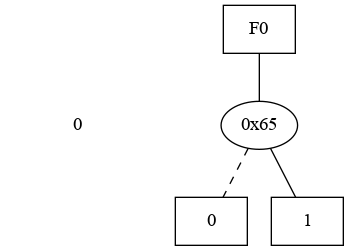

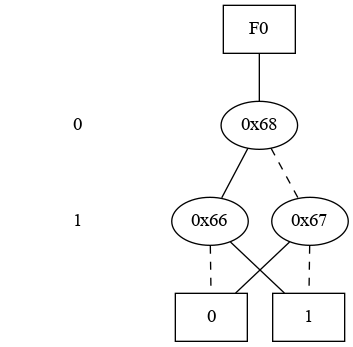

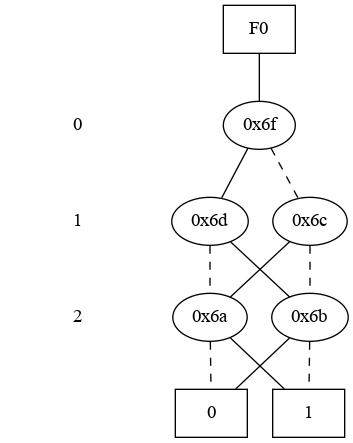

[None, None, None]

In [83]:
[grafica(migestor,pi[i]) for i in range(3)]

In [84]:
sigma3 = CambioInverso(migestor,pi)

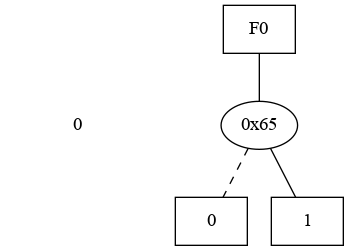

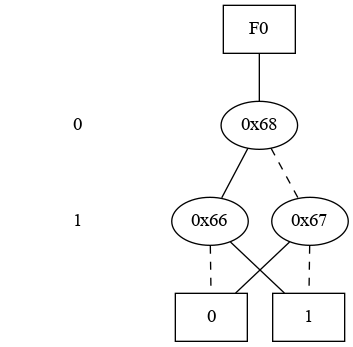

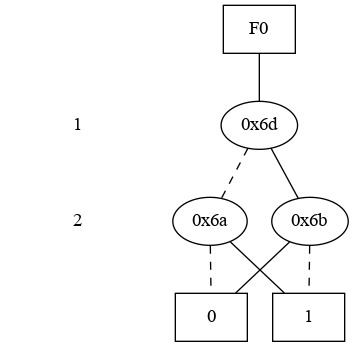

[None, None, None]

In [85]:
[grafica(migestor,sigma3[i]) for i in range(3)]

In [86]:
[[u,cambiaBaseArray(migestor, u,pi)] for u in B3]

[[[0, 0, 0], [0, 1, 1]],
 [[0, 0, 1], [0, 1, 0]],
 [[0, 1, 0], [0, 0, 0]],
 [[0, 1, 1], [0, 0, 1]],
 [[1, 0, 0], [1, 0, 0]],
 [[1, 0, 1], [1, 0, 1]],
 [[1, 1, 0], [1, 1, 1]],
 [[1, 1, 1], [1, 1, 0]]]

In [87]:
print(''.join(map(str,B3[3])))

011


In [88]:
[[print(''.join(map(str,u)) + '\\rightsquigarrow ' + ''.join(map(str,cambiaBaseArray(migestor, u,pi))) + ' \\\\')] for u in B3]

000\rightsquigarrow 011 \\
001\rightsquigarrow 010 \\
010\rightsquigarrow 000 \\
011\rightsquigarrow 001 \\
100\rightsquigarrow 100 \\
101\rightsquigarrow 101 \\
110\rightsquigarrow 111 \\
111\rightsquigarrow 110 \\


[[None], [None], [None], [None], [None], [None], [None], [None]]

In [89]:
pi4=randomBase(migestor,4)

In [90]:
pi4

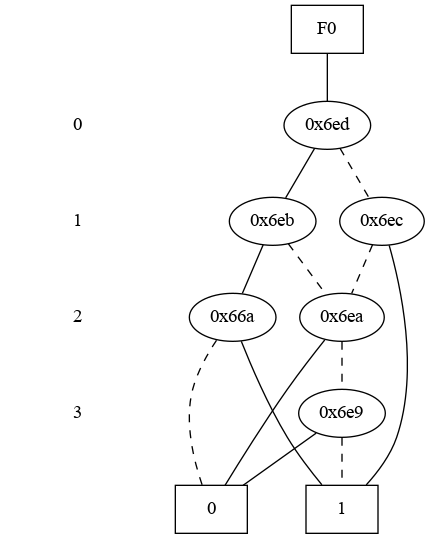

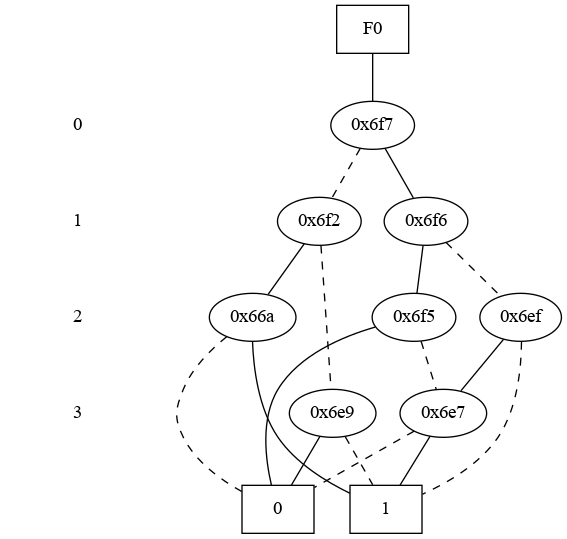

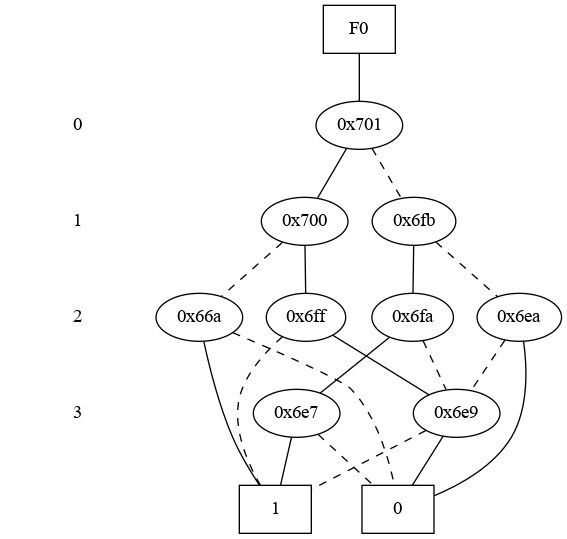

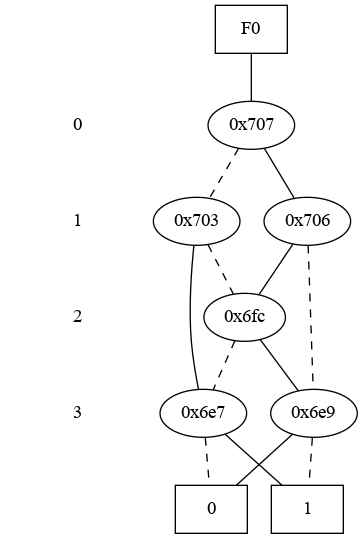

[None, None, None, None]

In [91]:
[grafica(migestor,pi4[i]) for i in range(4)]

In [92]:
sigma4 = CambioInverso(migestor,pi4)

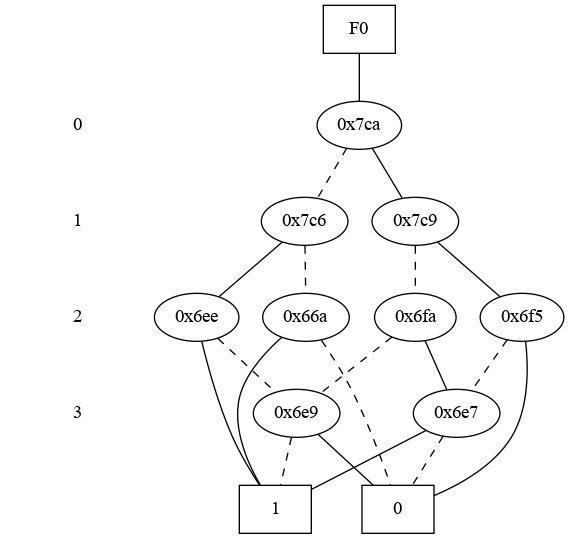

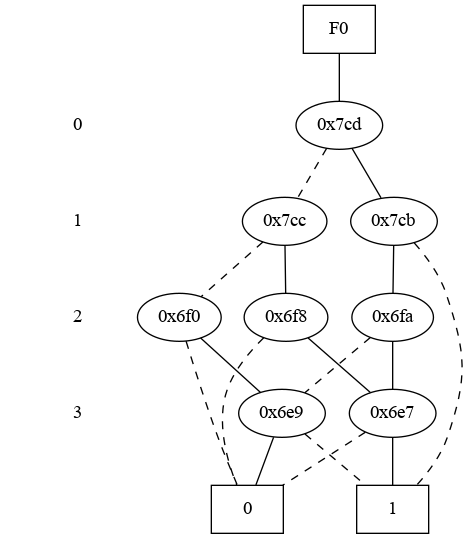

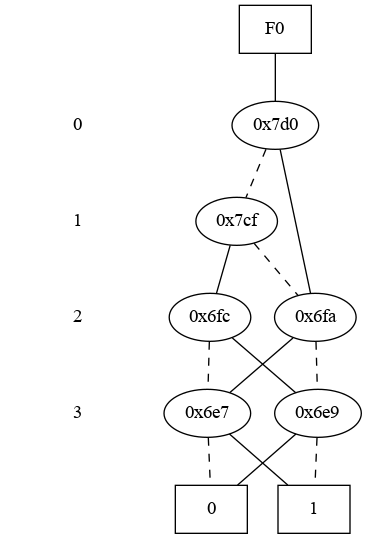

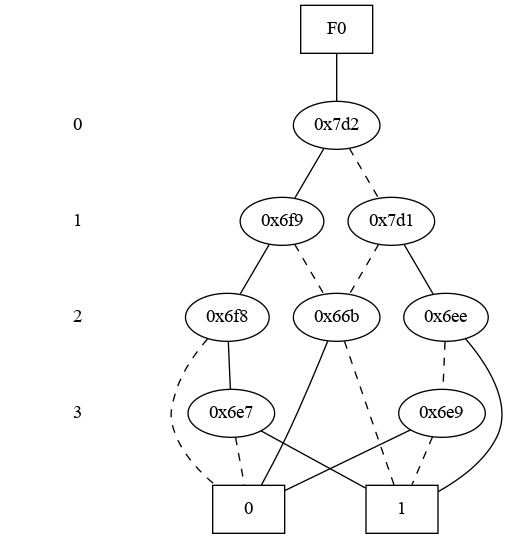

[None, None, None, None]

In [93]:
[grafica(migestor,sigma4[i]) for i in range(4)]

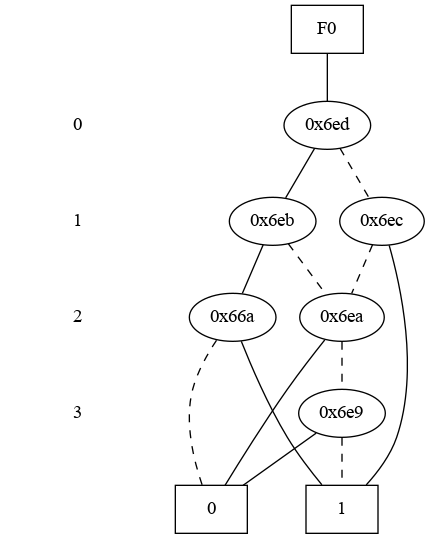

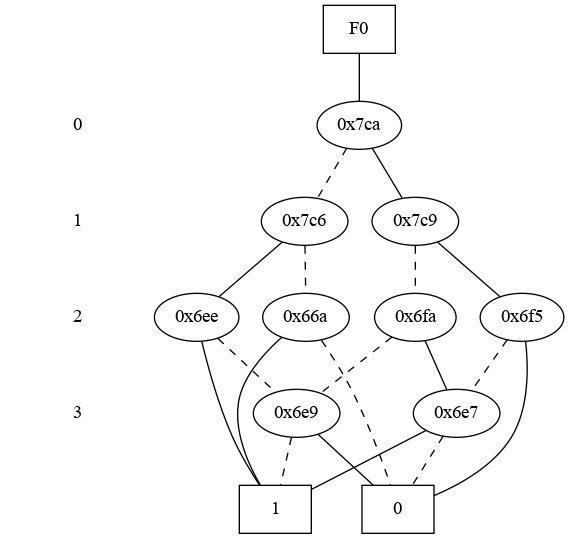

[None, None]

In [94]:
[grafica(migestor,pi4[0]), grafica(migestor,sigma4[0]) ]

In [95]:
B4 = BoolAlg(4)

In [96]:
B4

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [97]:
v_arr =[cambiaBaseArray(migestor,u,pi4) for u in B4]

In [98]:
list(zip(B4,v_arr))

[([0, 0, 0, 0], [1, 1, 1, 0]),
 ([0, 0, 0, 1], [0, 0, 0, 1]),
 ([0, 0, 1, 0], [0, 1, 0, 1]),
 ([0, 0, 1, 1], [0, 0, 0, 0]),
 ([0, 1, 0, 0], [1, 0, 1, 0]),
 ([0, 1, 0, 1], [1, 0, 0, 1]),
 ([0, 1, 1, 0], [1, 1, 0, 0]),
 ([0, 1, 1, 1], [1, 1, 1, 1]),
 ([1, 0, 0, 0], [1, 1, 0, 1]),
 ([1, 0, 0, 1], [0, 1, 0, 0]),
 ([1, 0, 1, 0], [0, 0, 1, 1]),
 ([1, 0, 1, 1], [0, 1, 1, 0]),
 ([1, 1, 0, 0], [0, 0, 1, 0]),
 ([1, 1, 0, 1], [0, 1, 1, 1]),
 ([1, 1, 1, 0], [1, 0, 1, 1]),
 ([1, 1, 1, 1], [1, 0, 0, 0])]

In [99]:
u_arr =[cambiaBaseArray(migestor,v,sigma4) for v in v_arr]

In [100]:
u_arr

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 0],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 1, 1, 1]]

In [101]:
[[u,cambiaBaseArray(migestor, u,pi4)] for u in B4]

[[[0, 0, 0, 0], [1, 1, 1, 0]],
 [[0, 0, 0, 1], [0, 0, 0, 1]],
 [[0, 0, 1, 0], [0, 1, 0, 1]],
 [[0, 0, 1, 1], [0, 0, 0, 0]],
 [[0, 1, 0, 0], [1, 0, 1, 0]],
 [[0, 1, 0, 1], [1, 0, 0, 1]],
 [[0, 1, 1, 0], [1, 1, 0, 0]],
 [[0, 1, 1, 1], [1, 1, 1, 1]],
 [[1, 0, 0, 0], [1, 1, 0, 1]],
 [[1, 0, 0, 1], [0, 1, 0, 0]],
 [[1, 0, 1, 0], [0, 0, 1, 1]],
 [[1, 0, 1, 1], [0, 1, 1, 0]],
 [[1, 1, 0, 0], [0, 0, 1, 0]],
 [[1, 1, 0, 1], [0, 1, 1, 1]],
 [[1, 1, 1, 0], [1, 0, 1, 1]],
 [[1, 1, 1, 1], [1, 0, 0, 0]]]

In [102]:
[[print(''.join(map(str,u)) + '\\rightsquigarrow ' + ''.join(map(str,cambiaBaseArray(migestor, u,pi4))) + ' \\\\')] for u in B4]

0000\rightsquigarrow 1110 \\
0001\rightsquigarrow 0001 \\
0010\rightsquigarrow 0101 \\
0011\rightsquigarrow 0000 \\
0100\rightsquigarrow 1010 \\
0101\rightsquigarrow 1001 \\
0110\rightsquigarrow 1100 \\
0111\rightsquigarrow 1111 \\
1000\rightsquigarrow 1101 \\
1001\rightsquigarrow 0100 \\
1010\rightsquigarrow 0011 \\
1011\rightsquigarrow 0110 \\
1100\rightsquigarrow 0010 \\
1101\rightsquigarrow 0111 \\
1110\rightsquigarrow 1011 \\
1111\rightsquigarrow 1000 \\


[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None]]

In [103]:
pi4[0]

In [104]:
[u for u in B4 if evalu(migestor,pi4[0],u)==0]

[[0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 1],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 1],
 [1, 1, 0, 0],
 [1, 1, 0, 1]]

In [105]:
evalu(migestor,pi4[0],B4[3])

0

In [106]:
pi0_B0=[u for u in B4 if evalu(migestor,pi4[0],u)==0]
pi0_B1=[u for u in B4 if evalu(migestor,pi4[0],u)==1]
pi1_B0=[u for u in B4 if evalu(migestor,pi4[1],u)==0]
pi1_B1=[u for u in B4 if evalu(migestor,pi4[1],u)==1]
pi2_B0=[u for u in B4 if evalu(migestor,pi4[2],u)==0]
pi2_B1=[u for u in B4 if evalu(migestor,pi4[2],u)==1]
pi3_B0=[u for u in B4 if evalu(migestor,pi4[3],u)==0]
pi3_B1=[u for u in B4 if evalu(migestor,pi4[3],u)==1]


In [107]:
cad='\pi_1=&\{\{'
for u in pi0_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi0_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [108]:
print(cad)

\pi_1=&\{\{0001, 0010, 0011, 1001, 1010, 1011, 1100, 1101\},\\ 
 &\{0000, 0100, 0101, 0110, 0111, 1000, 1110, 1111\}\} \\


In [109]:
cad='\pi_2=&\{\{'
for u in pi1_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi1_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [110]:
print(cad)

\pi_2=&\{\{0001, 0011, 0100, 0101, 1010, 1100, 1110, 1111\},\\ 
 &\{0000, 0010, 0110, 0111, 1000, 1001, 1011, 1101\}\} \\


In [111]:
cad='\pi_3=&\{\{'
for u in pi2_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi2_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [112]:
print(cad)

\pi_3=&\{\{0001, 0010, 0011, 0101, 0110, 1000, 1001, 1111\},\\ 
 &\{0000, 0100, 0111, 1010, 1011, 1100, 1101, 1110\}\} \\


In [113]:
cad='\pi_4=&\{\{'
for u in pi3_B0:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\},\\\\ \n &\{'
for u in pi3_B1:
    cad = cad + ''.join(map(str,u))
    cad = cad +', '
cad = cad[:-2] +'\}\} \\\\'

In [114]:
print(cad)

\pi_4=&\{\{0000, 0011, 0100, 0110, 1001, 1011, 1100, 1111\},\\ 
 &\{0001, 0010, 0101, 0111, 1000, 1010, 1101, 1110\}\} \\


In [115]:
[[print(''.join(map(str,u)) + '\\rightsquigarrow ' + ''.join(map(str,cambiaBaseArray(migestor, u,pi4))) + ' \\\\')] for u in B4]

0000\rightsquigarrow 1110 \\
0001\rightsquigarrow 0001 \\
0010\rightsquigarrow 0101 \\
0011\rightsquigarrow 0000 \\
0100\rightsquigarrow 1010 \\
0101\rightsquigarrow 1001 \\
0110\rightsquigarrow 1100 \\
0111\rightsquigarrow 1111 \\
1000\rightsquigarrow 1101 \\
1001\rightsquigarrow 0100 \\
1010\rightsquigarrow 0011 \\
1011\rightsquigarrow 0110 \\
1100\rightsquigarrow 0010 \\
1101\rightsquigarrow 0111 \\
1110\rightsquigarrow 1011 \\
1111\rightsquigarrow 1000 \\


[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None]]

2) random function y linearizacion

In [117]:
f = randomFunc(migestor,4,0.5)

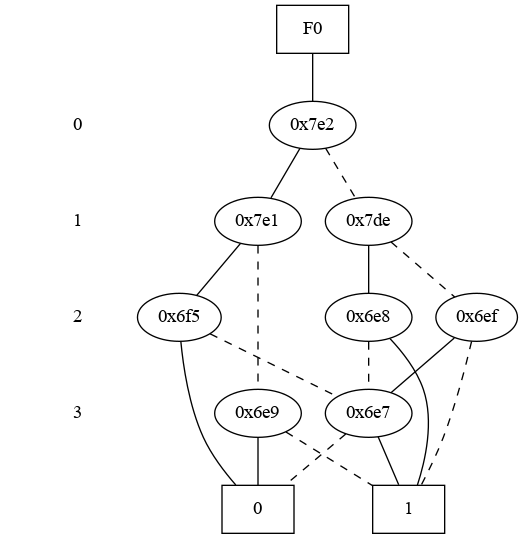

In [118]:
grafica(migestor,f)

In [119]:
prop = creaBasePropia(migestor,f,4)

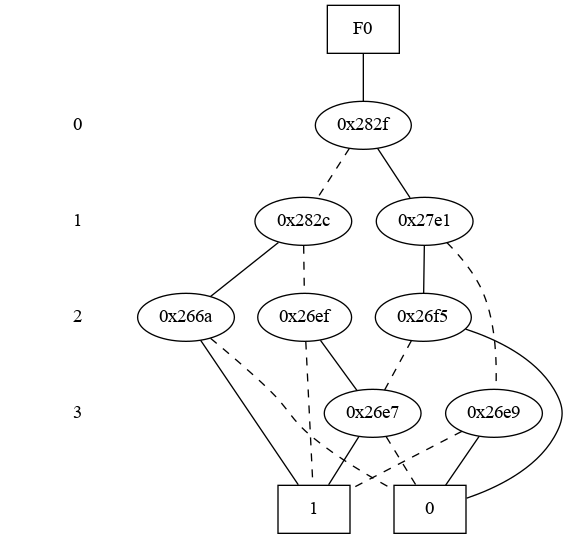

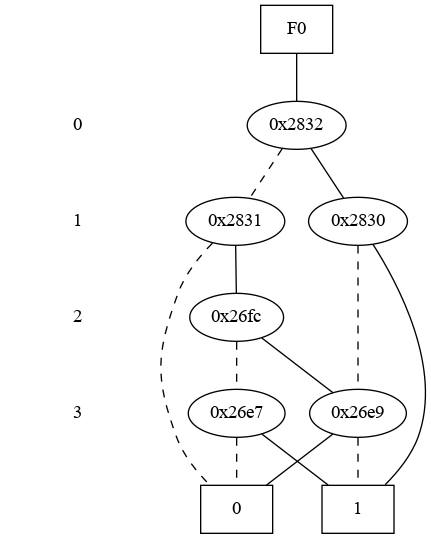

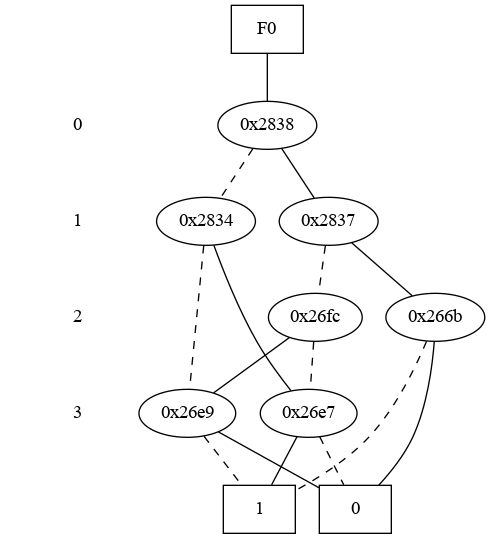

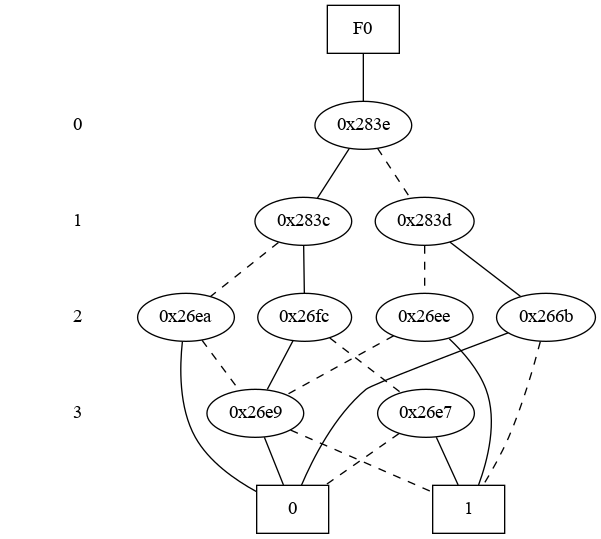

[None, None, None, None]

In [120]:
[grafica(migestor,prop[i]) for i in range(4)]

In [121]:
f2 = CambiaBase(migestor,f,prop)

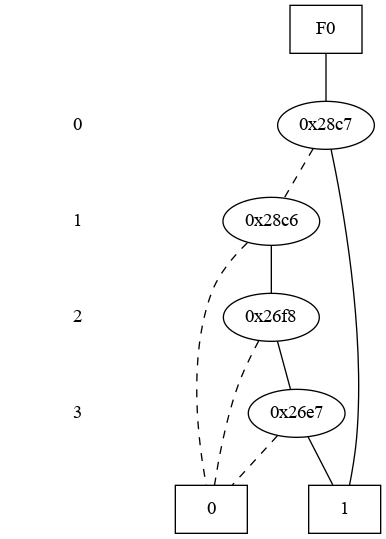

In [122]:
grafica(migestor,f2)